In [2]:
import pandas as pd
data = pd.read_csv('Crop_recommendation.csv')
df = pd.DataFrame(data)
df.head()

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice


In [4]:
df.columns = [col.lower() for col in df.columns]

In [6]:
df.isnull().sum()

n              0
p              0
k              0
temperature    0
humidity       0
ph             0
rainfall       0
label          0
dtype: int64

In [7]:
df['label'].unique()

array(['rice', 'maize', 'Soyabeans', 'beans', 'peas', 'groundnuts',
       'cowpeas', 'banana', 'mango', 'grapes', 'watermelon', 'apple',
       'orange', 'cotton', 'coffee'], dtype=object)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1697 entries, 0 to 1696
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   n            1697 non-null   int64  
 1   p            1697 non-null   int64  
 2   k            1697 non-null   int64  
 3   temperature  1697 non-null   float64
 4   humidity     1697 non-null   float64
 5   ph           1697 non-null   float64
 6   rainfall     1697 non-null   float64
 7   label        1697 non-null   object 
dtypes: float64(4), int64(3), object(1)
memory usage: 106.2+ KB


In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

C:\Users\RAMESH\AppData\Local\Temp\ipykernel_12156\730708571.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(df, x='label', order=df['label'].value_counts().index, palette='viridis')


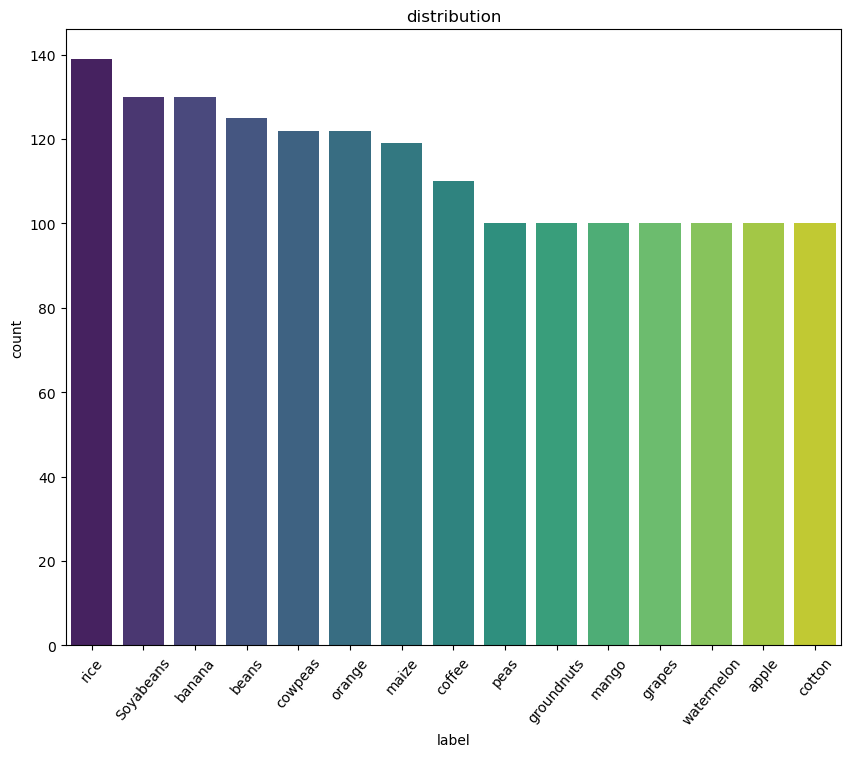

In [13]:
plt.figure(figsize=(10,8))
sns.countplot(df, x='label', order=df['label'].value_counts().index, palette='viridis')
plt.title('distribution')
plt.xticks(rotation=50)
plt.show()


In [37]:
df.head()

,n,p,k,temperature,humidity,ph,rainfall,label
0,90.0,42.0,43.0,20.879744,82.002744,6.502985,188.131995,rice
1,85.0,58.0,41.0,21.770462,80.319644,7.038096,188.131995,rice
2,60.0,55.0,44.0,23.004459,82.320763,7.840207,188.131995,rice
3,74.0,35.0,40.0,26.491096,80.158363,6.980401,188.131995,rice
4,78.0,42.0,42.0,20.130175,81.604873,7.628473,188.131995,rice


C:\Users\RAMESH\AppData\Local\Temp\ipykernel_12156\2277586473.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),cmap='coolwarm')


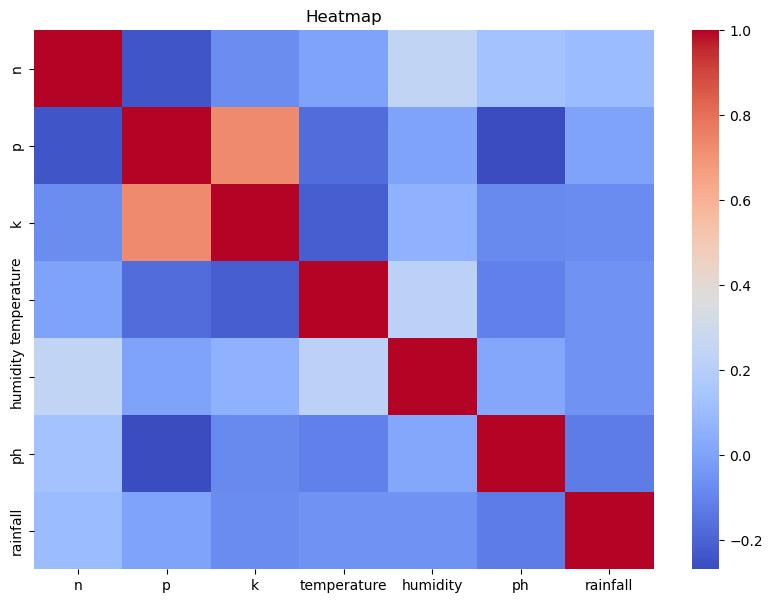

In [38]:
plt.figure(figsize=(10,7))
sns.heatmap(df.corr(),cmap='coolwarm')
plt.title('Heatmap')
plt.show()

C:\Users\RAMESH\AppData\Local\Temp\ipykernel_12156\2871353831.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = df.corr()


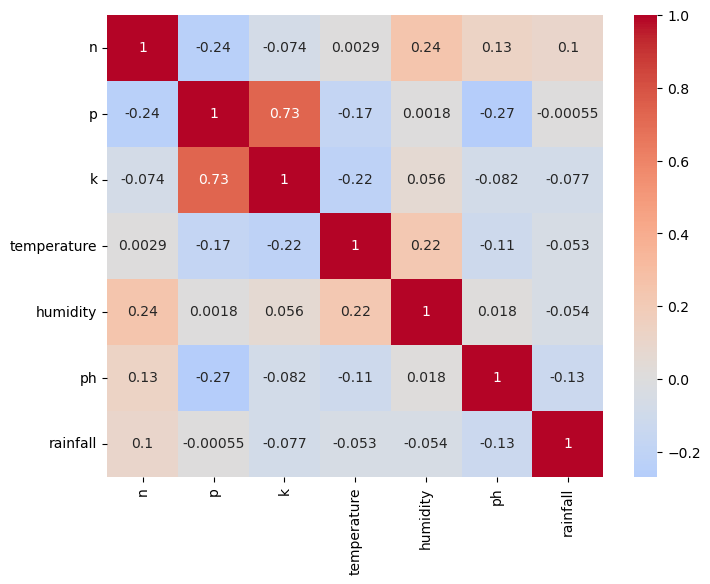

In [36]:
import matplotlib.pyplot

corr_matrix = df.corr()
plt.figure(figsize=(8,6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0)
plt.show()

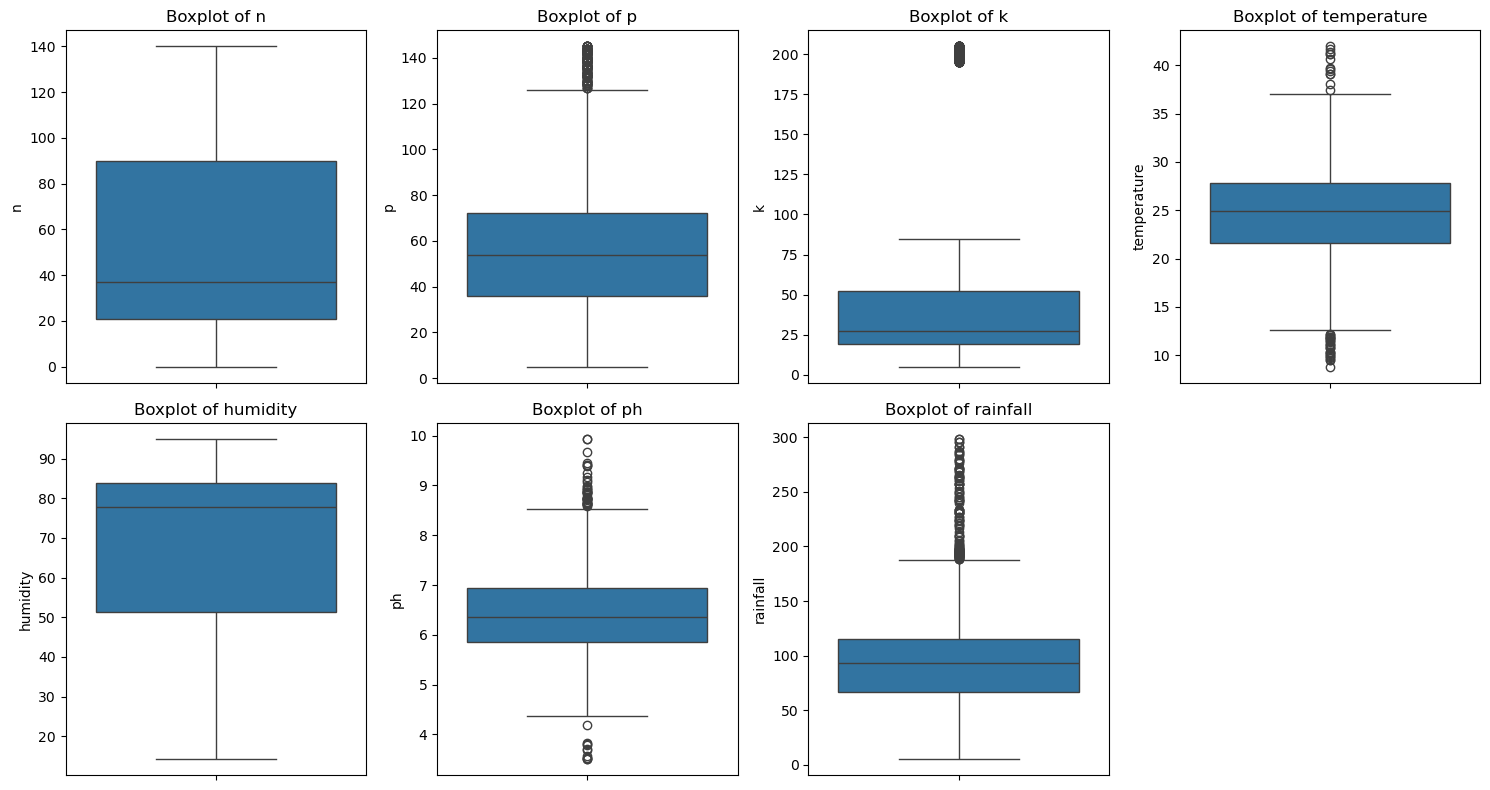

In [15]:
plt.figure(figsize=(15, 8))
for i, col in enumerate(['n', 'p', 'k', 'temperature', 'humidity', 'ph', 'rainfall']):
    plt.subplot(2, 4, i+1)
    sns.boxplot(df[col])
    plt.title(f'Boxplot of {col}')
plt.tight_layout()
plt.show()

In [19]:
import numpy as np

def cap_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df[column] = np.where(df[column] < lower_bound, lower_bound, df[column])
    df[column] = np.where(df[column] > upper_bound, upper_bound, df[column])

for col in ['n', 'p', 'k', 'temperature', 'humidity', 'ph', 'rainfall']:
    cap_outliers(df, col)

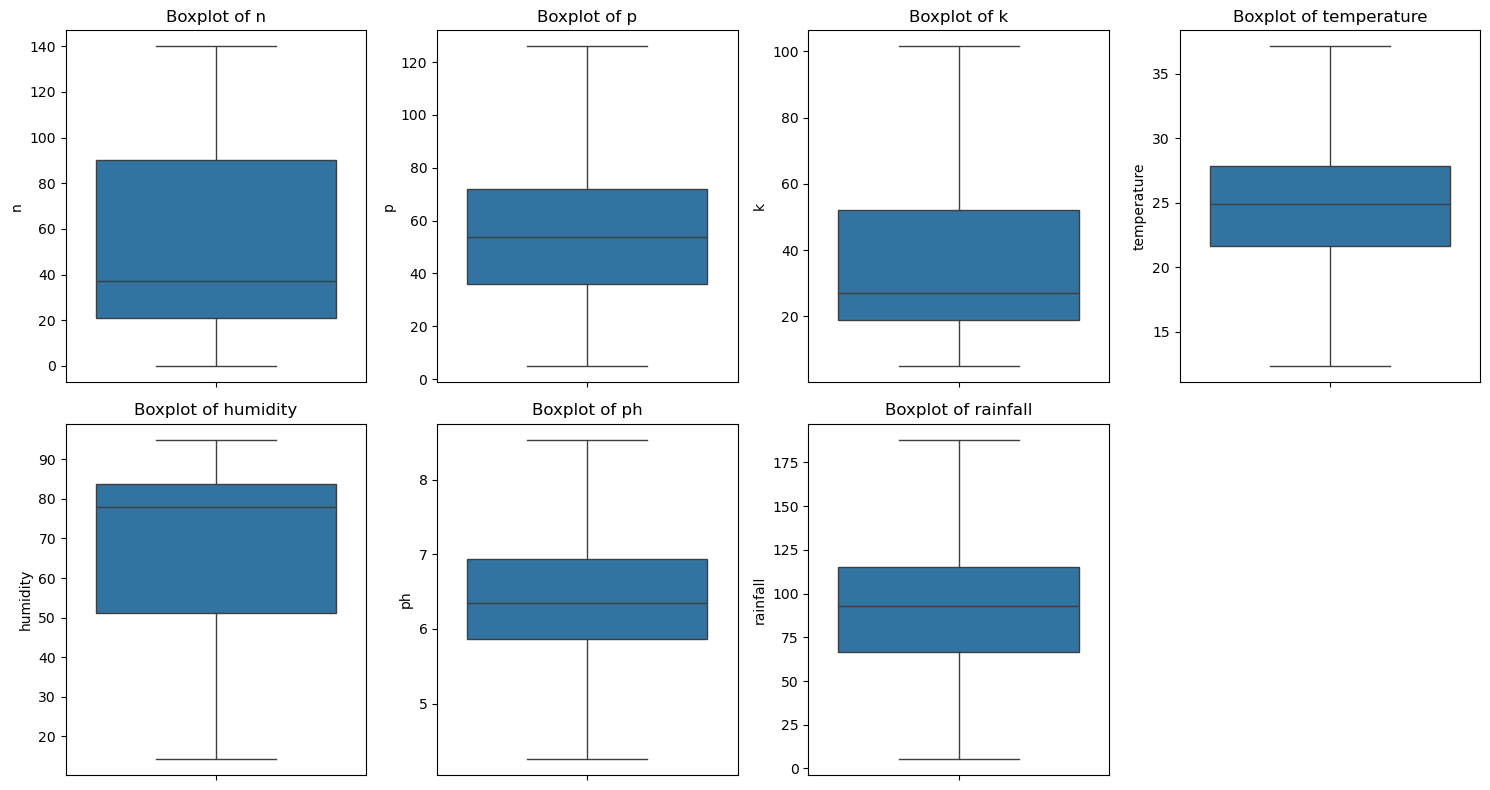

In [20]:
plt.figure(figsize=(15, 8))
for i, col in enumerate(['n', 'p', 'k', 'temperature', 'humidity', 'ph', 'rainfall']):
    plt.subplot(2, 4, i+1)
    sns.boxplot(df[col])
    plt.title(f'Boxplot of {col}')
plt.tight_layout()
plt.show()

In [22]:
df.shape

(1697, 8)

In [23]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report

x = df.drop(columns=['label'])
y = df['label']

xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.2,random_state=40)

models={
    'random forest': RandomForestClassifier(),
    'decision tree': DecisionTreeClassifier(),
    'logistic regression': LogisticRegression(),
    'svm': SVC(),
    'knn': KNeighborsClassifier(),
    'gradient boosting': GradientBoostingClassifier()
}


result={}
for name, model in models.items():
    model.fit(xtrain, ytrain)
    ypred = model.predict(xtest)
    accuracy = accuracy_score(ytest, ypred)
    result[name] = accuracy
    print(f'{name} accuracy: {accuracy:.2f}')
    print('-'*50)
    

random forest accuracy: 1.00
--------------------------------------------------
decision tree accuracy: 1.00
--------------------------------------------------
logistic regression accuracy: 0.98
--------------------------------------------------
svm accuracy: 0.99
--------------------------------------------------
knn accuracy: 0.99
--------------------------------------------------


C:\Users\RAMESH\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


gradient boosting accuracy: 1.00
--------------------------------------------------


In [26]:
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.2, random_state=42)

model = DecisionTreeClassifier(max_depth=10, min_samples_split=10, min_samples_leaf=10, random_state=42)
model.fit(xtrain, ytrain)

ypred = model.predict(xtest)
print("Accuracy:", accuracy_score(ytest, ypred))
print(classification_report(ytest, ypred))

Accuracy: 0.9852941176470589
              precision    recall  f1-score   support

   Soyabeans       1.00      1.00      1.00        25
       apple       1.00      1.00      1.00        23
      banana       0.93      1.00      0.96        25
       beans       1.00      1.00      1.00        31
      coffee       1.00      1.00      1.00        18
      cotton       0.88      1.00      0.94        23
     cowpeas       1.00      1.00      1.00        22
      grapes       1.00      1.00      1.00        22
  groundnuts       1.00      1.00      1.00        25
       maize       1.00      1.00      1.00        22
       mango       1.00      1.00      1.00        22
      orange       1.00      1.00      1.00        16
        peas       1.00      1.00      1.00        25
        rice       1.00      0.78      0.88        23
  watermelon       1.00      1.00      1.00        18

    accuracy                           0.99       340
   macro avg       0.99      0.99      0.99       3

In [27]:

full_tree = DecisionTreeClassifier(random_state=42)
full_tree.fit(xtrain, ytrain)


path = full_tree.cost_complexity_pruning_path(xtrain, ytrain)
ccp_alphas, impurities = path.ccp_alphas, path.impurities

best_alpha = None
best_score = 0

for alpha in ccp_alphas:
    pruned_tree = DecisionTreeClassifier(random_state=42, ccp_alpha=alpha)
    pruned_tree.fit(xtrain, ytrain)
    score = pruned_tree.score(xtest, ytest)
    
    if score > best_score:
        best_score = score
        best_alpha = alpha

final_model = DecisionTreeClassifier(random_state=42, ccp_alpha=best_alpha)
final_model.fit(xtrain, ytrain)

# Predictions
ypred = final_model.predict(xtest)

# Evaluation
print("Best Alpha:", best_alpha)
print("Final Accuracy:", accuracy_score(ytest, ypred))
print(classification_report(ytest, ypred))


Best Alpha: 0.0
Final Accuracy: 1.0
              precision    recall  f1-score   support

   Soyabeans       1.00      1.00      1.00        25
       apple       1.00      1.00      1.00        23
      banana       1.00      1.00      1.00        25
       beans       1.00      1.00      1.00        31
      coffee       1.00      1.00      1.00        18
      cotton       1.00      1.00      1.00        23
     cowpeas       1.00      1.00      1.00        22
      grapes       1.00      1.00      1.00        22
  groundnuts       1.00      1.00      1.00        25
       maize       1.00      1.00      1.00        22
       mango       1.00      1.00      1.00        22
      orange       1.00      1.00      1.00        16
        peas       1.00      1.00      1.00        25
        rice       1.00      1.00      1.00        23
  watermelon       1.00      1.00      1.00        18

    accuracy                           1.00       340
   macro avg       1.00      1.00      1.00 

In [28]:
import pickle
import json

with open("crop_model.pkl", "wb") as f:
    pickle.dump(final_model, f)

columns = {"d_col": [col.lower() for col in x.columns]}
with open("columns.json", "w") as f:
    f.write(json.dumps(columns))

print("Model saved as crop_model.pkl and columns saved as columns.json")

Model saved as crop_model.pkl and columns saved as columns.json


In [30]:
df.shape

(1697, 8)

In [32]:
sample_input = {
    'n': 10,
    'p': 42,
    'k': 43,
    'temperature': 20.879744,
    'humidity': 75,
    'ph': 5.5,
    'rainfall': 220
}

input_df = pd.DataFrame([sample_input])

predicted_crop = model.predict(input_df)
print("Predicted Crop:", predicted_crop[0])


Predicted Crop: rice


In [31]:
!pip show scikit-learn

Name: scikit-learn
Version: 1.3.0
Summary: A set of python modules for machine learning and data mining
Home-page: http://scikit-learn.org
Author: 
Author-email: 
License: new BSD
Location: C:\Users\RAMESH\anaconda3\Lib\site-packages
Requires: joblib, numpy, scipy, threadpoolctl
Required-by: daal4py, imbalanced-learn, pmdarima, scikit-learn-intelex


In [32]:
!pip install --upgrade scikit-learn

  Obtaining dependency information for scikit-learn from https://files.pythonhosted.org/packages/a1/a6/c5b78606743a1f28eae8f11973de6613a5ee87366796583fb74c67d54939/scikit_learn-1.6.1-cp311-cp311-win_amd64.whl.metadata
  Obtaining dependency information for threadpoolctl>=3.1.0 from https://files.pythonhosted.org/packages/4b/2c/ffbf7a134b9ab11a67b0cf0726453cedd9c5043a4fe7a35d1cefa9a1bcfb/threadpoolctl-3.5.0-py3-none-any.whl.metadata
Using cached scikit_learn-1.6.1-cp311-cp311-win_amd64.whl (11.1 MB)
Using cached threadpoolctl-3.5.0-py3-none-any.whl (18 kB)
  Attempting uninstall: threadpoolctl
    Found existing installation: threadpoolctl 2.2.0
    Uninstalling threadpoolctl-2.2.0:
      Successfully uninstalled threadpoolctl-2.2.0
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.3.0
    Uninstalling scikit-learn-1.3.0:
      Successfully uninstalled scikit-learn-1.3.0


ERROR: Could not install packages due to an OSError: [WinError 5] Access is denied: 'C:\\Users\\RAMESH\\anaconda3\\Lib\\site-packages\\~klearn\\decomposition\\_cdnmf_fast.cp311-win_amd64.pyd'
Consider using the `--user` option or check the permissions.



In [33]:
!pip show scikit-learn

Name: scikit-learn
Version: 1.6.1
Summary: A set of python modules for machine learning and data mining
Home-page: 
Author: 
Author-email: 
License: BSD 3-Clause License

 Copyright (c) 2007-2024 The scikit-learn developers.
 All rights reserved.

 Redistribution and use in source and binary forms, with or without
 modification, are permitted provided that the following conditions are met:

 * Redistributions of source code must retain the above copyright notice, this
   list of conditions and the following disclaimer.

 * Redistributions in binary form must reproduce the above copyright notice,
   this list of conditions and the following disclaimer in the documentation
   and/or other materials provided with the distribution.

 * Neither the name of the copyright holder nor the names of its
   contributors may be used to endorse or promote products derived from
   this software without specific prior written permission.

 THIS SOFTWARE IS PROVIDED BY THE COPYRIGHT HOLDERS AND CONTRIB